# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1, Question 2 (a) and (c)

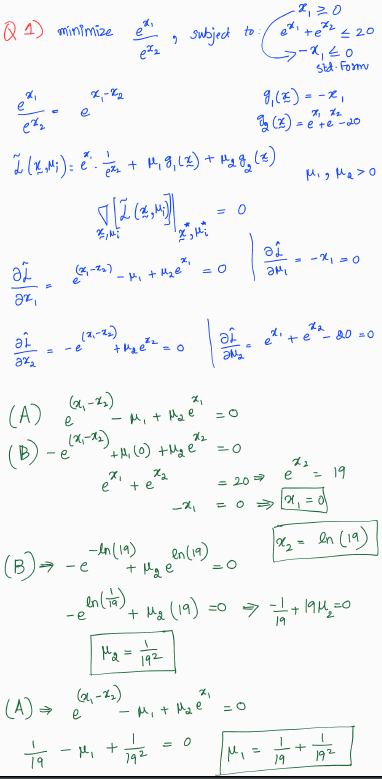

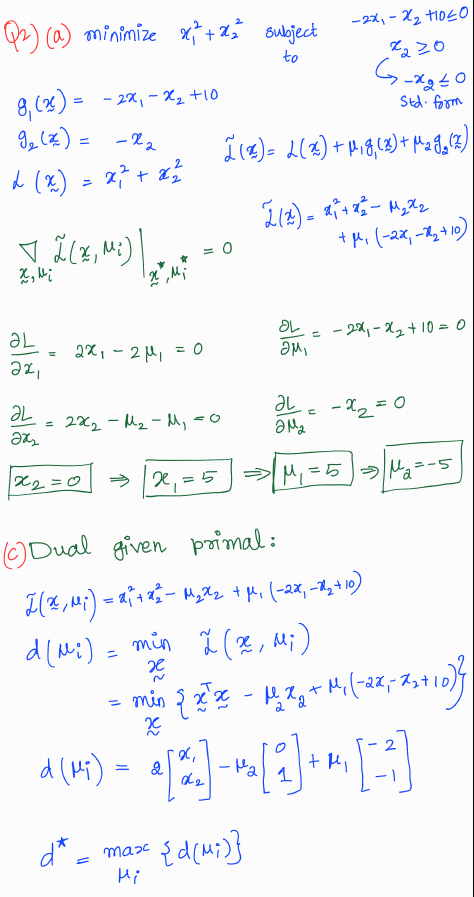

# Question 2

## Task (b)

In [3]:
def function(x1, x2):
    return x1**2 + x2**2


def constraint_function(x1):
    """ 
    x2 >= 10 - 2 * x1
    """
    return 10 - 2 * x1

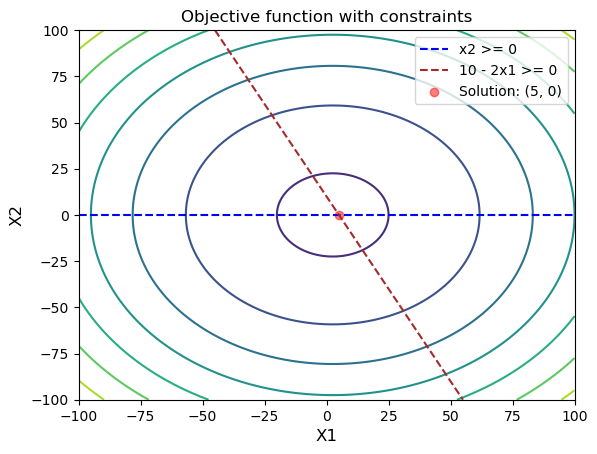

In [8]:
step = 1e-2
numbers = 1000

x1, x2 = np.linspace(-100, 100, numbers), np.linspace(-100, 100, numbers)
[X1, X2] = np.meshgrid(x1, x2)
C = np.linspace(1, 1000, numbers)

Z = np.add(function(X1, X2), -C)
x2_constraint = [0 for _ in range(numbers)]
x1_constraint_input = np.linspace(-45, 55, numbers)
constraint_1 = constraint_function(x1_constraint_input)

# plot
plt.contour(X1, X2, Z)
plt.plot(x1, x2_constraint, color='blue', linestyle='--', label='x2 >= 0')
plt.plot(x1_constraint_input, constraint_1, color='brown', linestyle='--', label='10 - 2x1 >= 0')
plt.scatter(5, 0, color='red', alpha=0.5, label='Solution: (5, 0)')

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)

plt.title('Objective function with constraints', fontsize=12)
plt.legend()
plt.show()

# Question 3

## Task (a)

In [5]:
def lagrange_function(theta: list):
    x1, x2 = theta
    term1 = -(x1**2) 
    term2 = - x1 * (10 - 0.5*(x2 + 5*x1))
    term3 = x2 * (0.5*(x2 + x1))
    term4 = - (0.5*(x2 + x1))**2
    # negating to turn maximumization into a minimization
    return term1 + term2 + term3 + term4


def grad_lagrange_function(theta: list):
    x1, x2 = theta
    entry_1 = (2.5 * x1) + (0.5 * x2) - 10
    entry_2 = 0.5 * x1 + 0.5 * x2
    return np.array([entry_1, entry_2])


def backtracking_line_search(d_0: list,theta: np.array, eta: float=1.0, rho: float=0.9, c: float=1e-4, MAX_ITER: int=100):
    
    counter = 0
    while lagrange_function(theta) - lagrange_function(theta - np.multiply(eta, d_0)) + (c * eta) * np.dot(d_0, d_0) < 0:
        eta = rho * eta
        counter += 1

        if counter == MAX_ITER:
            print(f'Terminated at the MAX_ITER value of {MAX_ITER}')
            break

    return eta, counter


theta = np.array([0, 0])
d_0 = grad_lagrange_function(theta)
eta, counter = backtracking_line_search(d_0=d_0, theta=theta)
print(eta, counter)

0.7290000000000001 3


## Task (b)

In [6]:
def steepest_descent(eta_init: float=1.0, rho: float=0.9, c: float=1e-4, MAX_ITER: int=100):
    theta_k = np.array([0, 0])

    count = 0
    while count < MAX_ITER:
        
        d_k = grad_lagrange_function(theta_k)
        eta_k, counter_eta = backtracking_line_search(d_0=d_k, theta=theta_k)
        theta_k = np.add(theta_k, -np.multiply(eta_k, d_k))

        if np.linalg.norm(np.multiply(eta_k, d_k), ord=2) < 1e-14:
            # convergence of theta_k
            break
        
        count += 1

    return (theta_k, count)


solution, counter = steepest_descent(MAX_ITER=500)
print(f'(x1, x2) = {solution[0], solution[1]}\n# iterations = {counter}')

(x1, x2) = (5.000000000000009, -4.999999999999999)
# iterations = 206
